# Group Project Simulated Data

I. Group projects are done in pairs and pairs are formed where people who study more tend to pair with others who study more. The amount of time devoted to the course is given by `study`. 

II. However, once the pairing is made, one of the partners usually contributes more to the project. One partner contributes 40% of their study time and the other contributes 60% of their study time. 

With partner1 and partner2 labeling done randomly, there is a slight positive trend in predicting the amount of work done by partner2 from the amount done by partner1. This captures the fact that harder-working students tend to work together (I).

When pairs are reordered based on who is the primary contributor, the trend in II is more clear. One partner contributes about 50% more than the other, as evidenced by the regression equation for predicting the primary contribution from the secondary. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statwrap
%use_all
np.random.seed(12)

In [2]:
N = 1000
n = N//2
names = [f'Person{i:0>3.0f}' for i in range(N)]

left, right = names[0:n], names[n:]
left_work = stats.norm.rvs(12,3, size=n)
right_work = stats.norm.rvs(12,3, size=n)

In [3]:
# Friendships formed by matching a left to a right
# People who work a lot are matched to people who don't work a lot

df_left = pd.DataFrame( data = {'Partner1': left, 'study1': left_work})
df_right = pd.DataFrame( data = {'Partner2': right, 'study2': right_work})

df_left.sort_values('study1', inplace = True, ascending = True)
df_right.sort_values('study2', inplace = True, ascending = True)

df_left.reset_index(inplace = True, drop = True)
df_right.reset_index(inplace = True, drop = True)

df = pd.concat([df_left, df_right], axis = 1)

In [4]:
balance = .4, .6
df['balance'] = np.random.choice(balance, size = n)

In [5]:
df['work1'] = df.study1 * df.balance 
df['work2'] = df.study2 * (1-df.balance)

In [6]:
df.head()

,Partner1,study1,Partner2,study2,balance,work1,work2
0,Person048,2.557750,Person551,0.867962,0.4,1.023100,0.520777
1,Person242,2.952254,Person599,2.534959,0.4,1.180901,1.520975
2,Person142,4.141520,Person775,3.529331,0.6,2.484912,1.411732
3,Person299,4.185011,Person806,3.615322,0.6,2.511006,1.446129
4,Person468,4.324286,Person816,4.536020,0.6,2.594572,1.814408


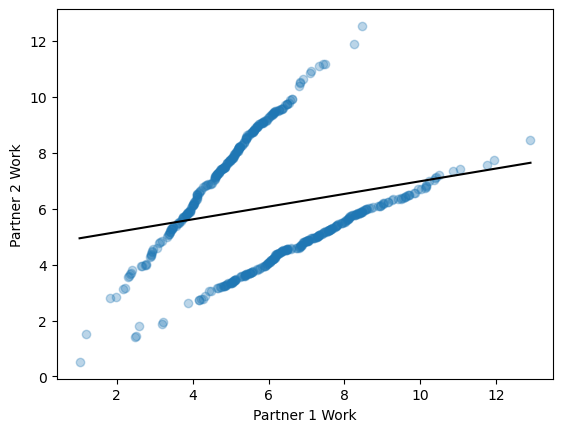

In [19]:
linest(df.work2, df.work1).plot(xlabel = 'Partner 1 Work',
                               ylabel = 'Partner 2 Work')

In [15]:
linest(df.work2, df.work1)

## Reorder Pairs

In [10]:
df['max_work'] = df[['work1','work2']].max(axis = 1)
df['min_work'] = df[['work1','work2']].min(axis = 1)

In [11]:
linest(df.max_work, df.min_work)

In [12]:
linest(df.min_work, df.max_work)

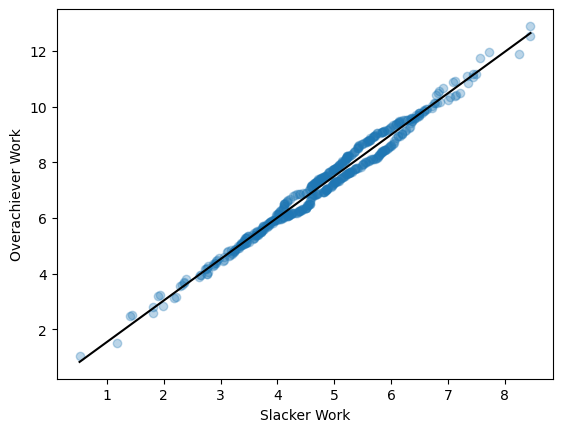

In [20]:
linest(df.max_work, df.min_work).plot(xlabel='Slacker Work', ylabel='Overachiever Work')